# Validity 2

## Draft; ToDO. Check everything, improve the plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empymod import dipole

# Style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True  # Comment this if you don't have LaTeX. You might have to adjust some strings.
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'

### General model parameters

In [2]:
x = np.logspace(np.log10(50/200), 2, 50)*200
freqs = np.logspace(-2, 1, 50)
inp = {
    'src': [0, 0, 0],
    'rec': [x, x*0, 0],
    'ab': 11,
    'freqtime': freqs,
    'verb': 1,}    

## Shallow case

In [3]:
# Update model
inp['src'][2] = 10
inp['rec'][2] = 100 
inp['depth'] = [0, 400]
inp['res'] = [2e14, 0.3, 1]

amp = np.zeros((len(freqs), len(x), 4))
err = np.zeros((len(freqs), len(x), 4))

for i, val in enumerate([1, 10, 100, 1000]):
    
    inp['res'] = [2e14, 0.3, val]

    # Calculate responses
    wer201 = dipole(htarg='wer_201_2018', **inp)
    qwe = dipole(ht='qwe', **inp)

    error = np.abs((wer201-qwe)/qwe)

    amp[:, :, i] = np.abs(qwe)
    err[:, :, i] = error


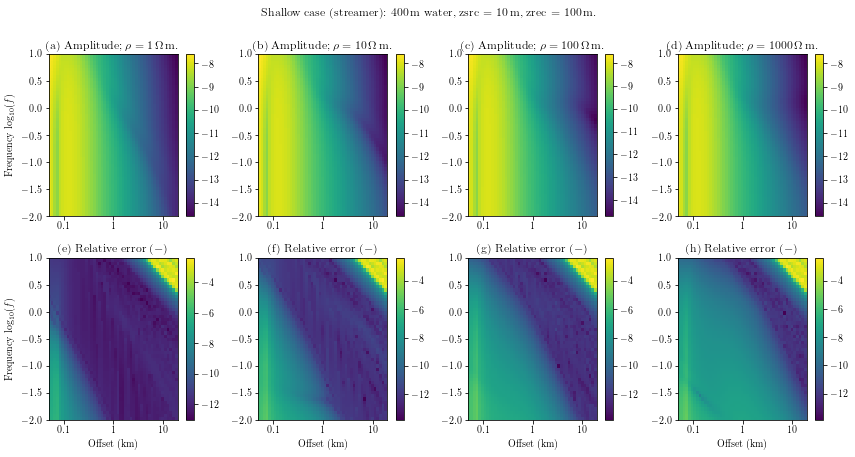

In [11]:
wer201.shape

plt.figure(figsize=(12, 6))

# Get x- and y- axis
#x = np.r_[rexp-0.25, rexp[-1]+0.25]
#y = np.r_[fexp-0.5, fexp[-1]+0.5]

# Plot amplitude
plt.subplot(241)
plt.title(r'(a) Amplitude; $\rho = 1\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(242)
plt.title(r'(b) Amplitude; $\rho = 10\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(243)
plt.title(r'(c) Amplitude; $\rho = 100\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(244)
plt.title(r'(d) Amplitude; $\rho = 1000\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])




# Plot error
plt.subplot(245)
plt.title('(e) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(246)
plt.title('(f) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(247)
plt.title('(g) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(248)
plt.title('(h) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

plt.tight_layout()

# Title
plt.suptitle('Shallow case (streamer): 400\,m water, zsrc = 10\,m, zrec = 100\,m.', y=1.05)

plt.savefig('../figures/validity_shallow.pdf', bbox_inches='tight')
plt.show()

## Deep sea case

In [5]:
# Update model
inp['src'][2] = 1990
inp['rec'][2] = 2000 
inp['depth'] = [0, 2000]
inp['res'] = [2e14, 0.3, 1]

amp2 = np.zeros((len(freqs), len(x), 4))
err2 = np.zeros((len(freqs), len(x), 4))

for i, val in enumerate([1, 10, 100, 1000]):
    
    inp['res'] = [2e14, 0.3, val]

    # Calculate responses
    wer201 = dipole(htarg='wer_201_2018', **inp)
    qwe = dipole(ht='qwe', **inp)

    error = np.abs((wer201-qwe)/qwe)

    amp2[:, :, i] = np.abs(qwe)
    err2[:, :, i] = error


* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.
* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.
* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


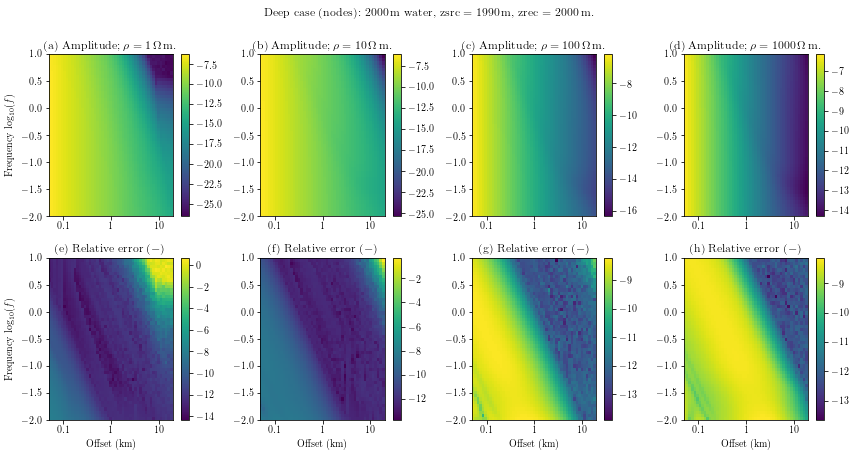

In [12]:
plt.figure(figsize=(12, 6))

# Get x- and y- axis
#x = np.r_[rexp-0.25, rexp[-1]+0.25]
#y = np.r_[fexp-0.5, fexp[-1]+0.5]

# Plot amplitude
plt.subplot(241)
plt.title(r'(a) Amplitude; $\rho = 1\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp2[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(242)
plt.title(r'(b) Amplitude; $\rho = 10\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp2[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(243)
plt.title(r'(c) Amplitude; $\rho = 100\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp2[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(244)
plt.title(r'(d) Amplitude; $\rho = 1000\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp2[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])




# Plot error
plt.subplot(245)
plt.title('(e) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err2[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(246)
plt.title('(f) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err2[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(247)
plt.title('(g) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err2[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(248)
plt.title('(h) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err2[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

plt.tight_layout()

# Title
plt.suptitle('Deep case (nodes): 2000\,m water, zsrc = 1990\,m, zrec = 2000\,m.', y=1.05)

plt.savefig('../figures/validity_deep.pdf', bbox_inches='tight')
plt.show()

## Land case

In [7]:
# Update model
inp['src'][2] = 0.5
inp['rec'][2] = 0.8 
inp['depth'] = [0]
inp['res'] = [2e14, 1]

amp3 = np.zeros((len(freqs), len(x), 4))
err3 = np.zeros((len(freqs), len(x), 4))

for i, val in enumerate([1, 10, 100, 1000]):
    
    inp['res'] = [2e14, val]

    # Calculate responses
    wer201 = dipole(htarg='wer_201_2018', **inp)
    qwe = dipole(ht='qwe', **inp)

    error = np.abs((wer201-qwe)/qwe)

    amp3[:, :, i] = np.abs(qwe)
    err3[:, :, i] = error


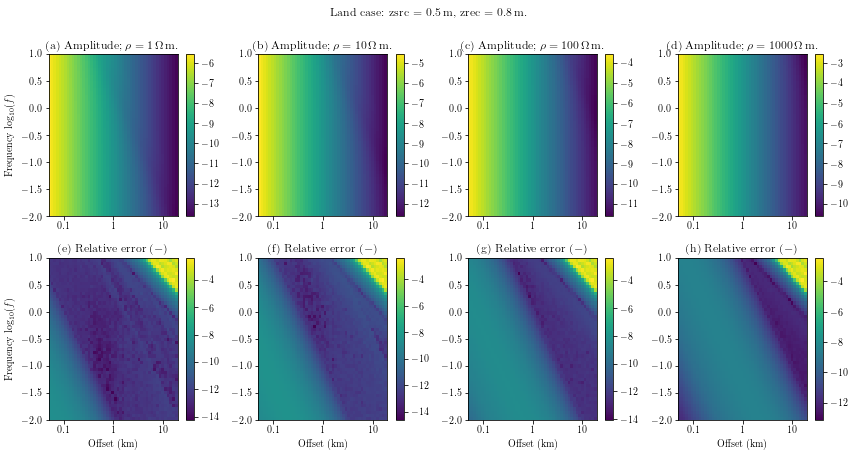

In [10]:
plt.figure(figsize=(12, 6))

# Get x- and y- axis
#x = np.r_[rexp-0.25, rexp[-1]+0.25]
#y = np.r_[fexp-0.5, fexp[-1]+0.5]

# Plot amplitude
plt.subplot(241)
plt.title(r'(a) Amplitude; $\rho = 1\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp3[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(242)
plt.title(r'(b) Amplitude; $\rho = 10\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp3[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(243)
plt.title(r'(c) Amplitude; $\rho = 100\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp3[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot amplitude
plt.subplot(244)
plt.title(r'(d) Amplitude; $\rho = 1000\,\Omega\,$m.')
CP1 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(amp3[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP1)
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])




# Plot error
plt.subplot(245)
plt.title('(e) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err3[:, :, 0]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(246)
plt.title('(f) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err3[:, :, 1]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(247)
plt.title('(g) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err3[:, :, 2]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

# Plot error
plt.subplot(248)
plt.title('(h) Relative error ($-$)')

CP2 = plt.pcolormesh(np.log10(x/1000), np.log10(freqs), np.log10(err3[:, :, 3]), linewidth=0, rasterized=True)
plt.colorbar(CP2)
plt.xlabel(r'Offset (km)')
plt.xticks([-1, 0, 1], ['0.1', '1', '10'])

plt.tight_layout()

# Title
plt.suptitle('Land case: zsrc = 0.5\,m, zrec = 0.8\,m.', y=1.05)

plt.savefig('../figures/validity_land.pdf', bbox_inches='tight')
plt.show()

In [9]:
import printinfo
printinfo.info()